In [4]:
%pip install pydub
%pip install librosa
%pip install soundfile
%pip install tqdm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.7 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.7 MB 621.2 kB/s eta 0:00:04
   ------- -------------------------------- 0.5/2.7 MB 621.2 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.7 MB 621.2 kB/s eta 0:00:04
   ----------- ---------------------------- 0.8/2.7 MB 621.2 kB/s eta 0:00:04
   --------------- ------------------------ 1.0/2.7 MB 645.1 kB/s eta 0:00:03
   ------------------- -------------------- 1.3/2.7 MB 691.7 kB/s eta 0:00:03
   ------------------- -------------------- 1.3/2.7 MB 691.7 kB/s eta 0:00:03
   ---------------------- ----------------- 1.6/2.7 MB 699.0 kB/s eta 0:00:02
   ---------------------- ----------------- 1.6/2.7 MB 699.0 kB/s eta 0:00:02
   -------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os
import librosa
import soundfile as sf
from tqdm import tqdm
import numpy as np

# Set base path to current working directory
BASE_PATH = os.getcwd()

sfx_dir = os.path.join(BASE_PATH, "assets")
wav_dir = os.path.join(sfx_dir, "wav")
os.makedirs(wav_dir, exist_ok=True)

def convert_mp3_to_wav_mirex(mp3_path, wav_path):
    """Konversi MP3 ke WAV format MIREX standar dengan sample rate 44100 Hz"""
    try:
        # Load audio dengan sample rate 44100 Hz dan mono channel
        audio, sr = librosa.load(mp3_path, sr=44100, mono=True)

        # Normalisasi audio ke 16-bit range jika diperlukan
        if np.max(np.abs(audio)) > 1.0:
            audio = audio / np.max(np.abs(audio))
        
        # Simpan sebagai WAV 16-bit PCM
        sf.write(wav_path, audio, 44100, subtype='PCM_16')
        return True
    except Exception as e:
        print(f"❌ Error converting {mp3_path}: {str(e)}")
        return False

# Temukan semua file MP3 dalam folder sfx (tidak termasuk subfolder wav)
mp3_files = []
for root, dirs, files in os.walk(sfx_dir):
    # Skip folder 'wav' yang sudah kita buat
    if "wav" in os.path.basename(root):
        continue
    
    for file in files:
        if file.lower().endswith('.mp3'):
            mp3_files.append(os.path.join(root, file))

print(f"✅ Ditemukan {len(mp3_files)} file MP3 untuk dikonversi")

# Proses konversi dengan progress bar
successful_conversions = 0
for mp3_path in tqdm(mp3_files, desc="Mengonversi file audio"):
    # Buat path output di folder wav dengan struktur subfolder yang sama
    relative_path = os.path.relpath(mp3_path, sfx_dir)
    wav_subdir = os.path.dirname(relative_path)
    wav_filename = os.path.splitext(os.path.basename(mp3_path))[0] + '.wav'
    
    # Buat direktori output jika belum ada
    output_subdir = os.path.join(wav_dir, wav_subdir)
    os.makedirs(output_subdir, exist_ok=True)
    
    wav_path = os.path.join(output_subdir, wav_filename)

    if convert_mp3_to_wav_mirex(mp3_path, wav_path):
        # Hapus file MP3 setelah konversi berhasil
        os.remove(mp3_path)
        successful_conversions += 1

print(f"\n✅ Berhasil mengonversi {successful_conversions}/{len(mp3_files)} file ke format WAV")

# Verifikasi konversi
wav_count = 0
for root, _, files in os.walk(wav_dir):
    for file in files:
        if file.lower().endswith('.wav'):
            wav_count += 1

print(f"Total file WAV setelah konversi: {wav_count}")
print(f"File WAV disimpan di: {wav_dir}")

✅ Ditemukan 15 file MP3 untuk dikonversi


Mengonversi file audio:   0%|          | 0/15 [00:00<?, ?it/s]

Mengonversi file audio: 100%|██████████| 15/15 [00:01<00:00, 14.76it/s]


✅ Berhasil mengonversi 15/15 file ke format WAV
Total file WAV setelah konversi: 15
File WAV disimpan di: c:\shadow-boxing\shadow-boxing\assets\wav


In [9]:
%pip install pyloudnorm


   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------------------- 0/2 [future]
   ---------------------------


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Import library untuk LUFS measurement
import pyloudnorm as pyln
import matplotlib.pyplot as plt
import pandas as pd

# Fungsi untuk mengukur LUFS dari file audio
def measure_lufs(audio_path):
    """Mengukur LUFS (Loudness Units Full Scale) dari file audio"""
    try:
        # Load audio
        data, rate = sf.read(audio_path)
        
        # Jika stereo, convert ke mono dengan averaging
        if len(data.shape) > 1:
            data = data.mean(axis=1)
        
        # Create a meter
        meter = pyln.Meter(rate)
        
        # Measure the loudness
        loudness = meter.integrated_loudness(data)
        
        return loudness
    except Exception as e:
        print(f"Error measuring {audio_path}: {str(e)}")
        return None

print("✅ Fungsi pengukur LUFS siap digunakan")

✅ Fungsi pengukur LUFS siap digunakan


In [11]:
# Scan semua file WAV dan ukur LUFS-nya
wav_dir = os.path.join(BASE_PATH, "assets", "wav")

# Cari semua file WAV
wav_files = []
for root, dirs, files in os.walk(wav_dir):
    for file in files:
        if file.lower().endswith('.wav'):
            wav_files.append(os.path.join(root, file))

print(f"📊 Ditemukan {len(wav_files)} file WAV untuk dianalisis\n")

# Ukur LUFS setiap file
lufs_data = []
for wav_path in tqdm(wav_files, desc="Mengukur LUFS"):
    loudness = measure_lufs(wav_path)
    if loudness is not None:
        filename = os.path.basename(wav_path)
        lufs_data.append({
            'filename': filename,
            'path': wav_path,
            'lufs': loudness
        })
        print(f"{filename}: {loudness:.2f} LUFS")

# Buat DataFrame untuk analisis
df_lufs = pd.DataFrame(lufs_data)
print(f"\n✅ Selesai mengukur LUFS dari {len(df_lufs)} file")

📊 Ditemukan 15 file WAV untuk dianalisis



Mengukur LUFS:  13%|█▎        | 2/15 [00:00<00:02,  5.95it/s]

fight_music.wav: -13.84 LUFS
ko_music.wav: -31.68 LUFS


Mengukur LUFS:  40%|████      | 6/15 [00:00<00:00, 12.19it/s]

menu_music.wav: -18.88 LUFS
boxing-bell.wav: -14.92 LUFS
enemy-punch-missed.wav: -30.75 LUFS
enemy-punch.wav: -14.39 LUFS
KO.wav: -8.87 LUFS
Error measuring c:\shadow-boxing\shadow-boxing\assets\wav\sfx\player-punch.wav: Audio must have length greater than the block size.


Mengukur LUFS:  80%|████████  | 12/15 [00:00<00:00, 19.01it/s]

punch-blocked.wav: -10.67 LUFS
final_round.wav: -17.16 LUFS
round-1.wav: -14.11 LUFS
round-2.wav: -17.84 LUFS
round-3.wav: -14.47 LUFS


Mengukur LUFS: 100%|██████████| 15/15 [00:01<00:00, 14.46it/s]

round_1.wav: -18.01 LUFS
round_2.wav: -17.25 LUFS

✅ Selesai mengukur LUFS dari 14 file


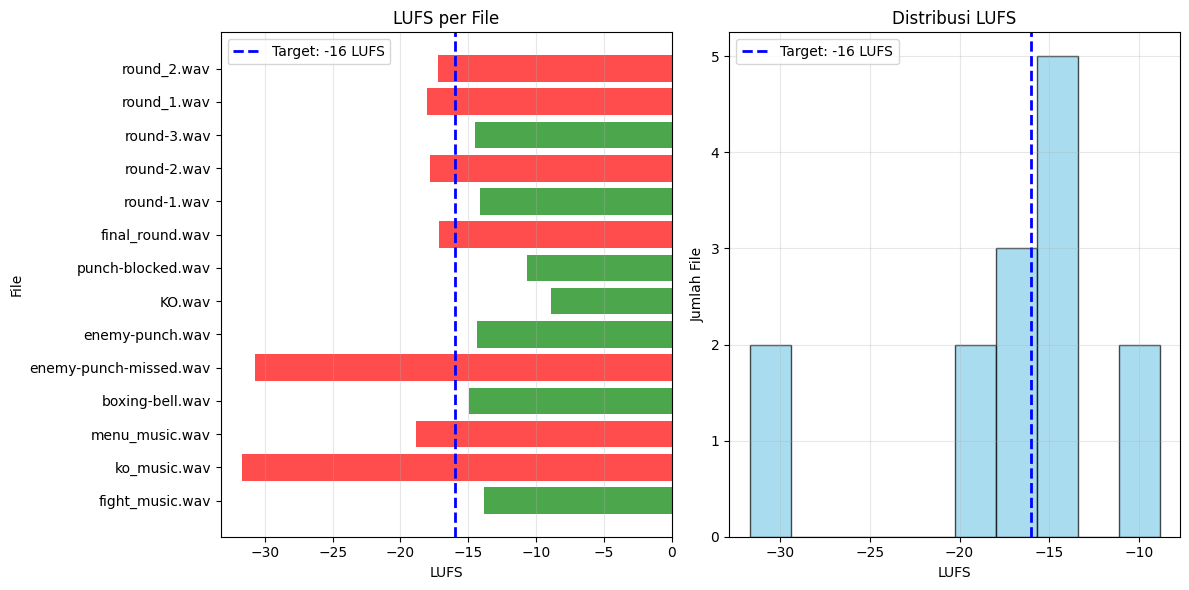


📊 STATISTIK LUFS:
Mean LUFS: -17.35
Min LUFS: -31.68
Max LUFS: -8.87

🔴 File dengan LUFS < -16: 7
🟢 File dengan LUFS >= -16: 7


In [12]:
# Plot distribusi LUFS
plt.figure(figsize=(12, 6))

# Bar plot
plt.subplot(1, 2, 1)
colors = ['red' if lufs < -16 else 'green' for lufs in df_lufs['lufs']]
plt.barh(df_lufs['filename'], df_lufs['lufs'], color=colors, alpha=0.7)
plt.axvline(x=-16, color='blue', linestyle='--', linewidth=2, label='Target: -16 LUFS')
plt.xlabel('LUFS')
plt.ylabel('File')
plt.title('LUFS per File')
plt.legend()
plt.grid(axis='x', alpha=0.3)

# Histogram
plt.subplot(1, 2, 2)
plt.hist(df_lufs['lufs'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(x=-16, color='blue', linestyle='--', linewidth=2, label='Target: -16 LUFS')
plt.xlabel('LUFS')
plt.ylabel('Jumlah File')
plt.title('Distribusi LUFS')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Statistik
print("\n📊 STATISTIK LUFS:")
print(f"Mean LUFS: {df_lufs['lufs'].mean():.2f}")
print(f"Min LUFS: {df_lufs['lufs'].min():.2f}")
print(f"Max LUFS: {df_lufs['lufs'].max():.2f}")
print(f"\n🔴 File dengan LUFS < -16: {len(df_lufs[df_lufs['lufs'] < -16])}")
print(f"🟢 File dengan LUFS >= -16: {len(df_lufs[df_lufs['lufs'] >= -16])}")

In [13]:
# Identifikasi file yang perlu dinaikkan LUFS-nya
TARGET_LUFS = -16.0
files_to_adjust = df_lufs[df_lufs['lufs'] < TARGET_LUFS].copy()

print(f"📋 File yang perlu disesuaikan ke -16 LUFS:\n")
for idx, row in files_to_adjust.iterrows():
    gain_needed = TARGET_LUFS - row['lufs']
    print(f"  • {row['filename']}")
    print(f"    Current: {row['lufs']:.2f} LUFS")
    print(f"    Gain needed: +{gain_needed:.2f} dB\n")

print(f"Total: {len(files_to_adjust)} file perlu disesuaikan")

📋 File yang perlu disesuaikan ke -16 LUFS:

  • ko_music.wav
    Current: -31.68 LUFS
    Gain needed: +15.68 dB

  • menu_music.wav
    Current: -18.88 LUFS
    Gain needed: +2.88 dB

  • enemy-punch-missed.wav
    Current: -30.75 LUFS
    Gain needed: +14.75 dB

  • final_round.wav
    Current: -17.16 LUFS
    Gain needed: +1.16 dB

  • round-2.wav
    Current: -17.84 LUFS
    Gain needed: +1.84 dB

  • round_1.wav
    Current: -18.01 LUFS
    Gain needed: +2.01 dB

  • round_2.wav
    Current: -17.25 LUFS
    Gain needed: +1.25 dB

Total: 7 file perlu disesuaikan


In [14]:
# Fungsi untuk menaikkan LUFS ke target tertentu
def normalize_loudness(audio_path, target_lufs=-16.0):
    """Normalize audio file ke target LUFS"""
    try:
        # Load audio
        data, rate = sf.read(audio_path)
        
        # Jika stereo, process sebagai stereo
        if len(data.shape) == 1:
            data = data.reshape(-1, 1)
        
        # Create meter
        meter = pyln.Meter(rate)
        
        # Measure current loudness
        current_loudness = meter.integrated_loudness(data)
        
        # Normalize audio to target LUFS
        normalized_audio = pyln.normalize.loudness(data, current_loudness, target_lufs)
        
        return normalized_audio, rate, current_loudness
    except Exception as e:
        print(f"Error normalizing {audio_path}: {str(e)}")
        return None, None, None

print("✅ Fungsi normalisasi LUFS siap digunakan")

✅ Fungsi normalisasi LUFS siap digunakan


In [15]:
# Proses normalisasi untuk file yang perlu disesuaikan
TARGET_LUFS = -16.0
adjusted_count = 0
results = []

print("🔧 Memulai proses normalisasi LUFS...\n")

for idx, row in tqdm(files_to_adjust.iterrows(), total=len(files_to_adjust), desc="Normalizing audio"):
    audio_path = row['path']
    filename = row['filename']
    original_lufs = row['lufs']
    
    # Normalize audio
    normalized_audio, rate, measured_lufs = normalize_loudness(audio_path, TARGET_LUFS)
    
    if normalized_audio is not None:
        # Backup file asli (opsional)
        backup_path = audio_path.replace('.wav', '_original.wav')
        
        # Simpan file yang sudah dinormalisasi (overwrite)
        sf.write(audio_path, normalized_audio, rate, subtype='PCM_16')
        
        # Verify hasil normalisasi
        new_lufs = measure_lufs(audio_path)
        
        results.append({
            'filename': filename,
            'original_lufs': original_lufs,
            'new_lufs': new_lufs,
            'target_lufs': TARGET_LUFS
        })
        
        print(f"✅ {filename}")
        print(f"   Before: {original_lufs:.2f} LUFS → After: {new_lufs:.2f} LUFS\n")
        
        adjusted_count += 1

print(f"\n🎉 Selesai! {adjusted_count} file telah dinormalisasi ke {TARGET_LUFS} LUFS")

# Buat DataFrame hasil
df_results = pd.DataFrame(results)
display(df_results)

🔧 Memulai proses normalisasi LUFS...



Normalizing audio:   0%|          | 0/7 [00:00<?, ?it/s]c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Normalizing audio:  14%|█▍        | 1/7 [00:00<00:01,  3.44it/s]

✅ ko_music.wav
   Before: -31.68 LUFS → After: -16.02 LUFS



Normalizing audio:  29%|██▊       | 2/7 [00:00<00:01,  3.59it/s]c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Normalizing audio:  57%|█████▋    | 4/7 [00:00<00:00,  6.52it/s]c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Normalizing audio:  57%|█████▋    | 4/7 [00:00<00:00,  6.52it/s]

✅ menu_music.wav
   Before: -18.88 LUFS → After: -16.00 LUFS

✅ enemy-punch-missed.wav
   Before: -30.75 LUFS → After: -16.00 LUFS

✅ final_round.wav
   Before: -17.16 LUFS → After: -16.00 LUFS

✅ round-2.wav
   Before: -17.84 LUFS → After: -16.01 LUFS



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Normalizing audio:  86%|████████▌ | 6/7 [00:00<00:00,  8.50it/s]c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Normalizing audio:  86%|████████▌ | 6/7 [00:00<00:00,  8.50it/s]c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyloudnorm\normalize.py:62: UserWarning: Possible clipped samples in output.
  warnings.warn("Possible clipped samples in output.")
Normalizing audio: 100%|██████████| 7/7 [00:00<00:00,  7

✅ round_1.wav
   Before: -18.01 LUFS → After: -16.01 LUFS

✅ round_2.wav
   Before: -17.25 LUFS → After: -16.00 LUFS


🎉 Selesai! 7 file telah dinormalisasi ke -16.0 LUFS


,filename,original_lufs,new_lufs,target_lufs
0,ko_music.wav,-31.684594,-16.019890,-16.0
1,menu_music.wav,-18.881867,-16.000000,-16.0
2,enemy-punch-missed.wav,-30.745193,-16.000001,-16.0
3,final_round.wav,-17.164573,-16.003897,-16.0
4,round-2.wav,-17.839643,-16.011663,-16.0
5,round_1.wav,-18.009054,-16.012526,-16.0
6,round_2.wav,-17.245186,-16.001761,-16.0


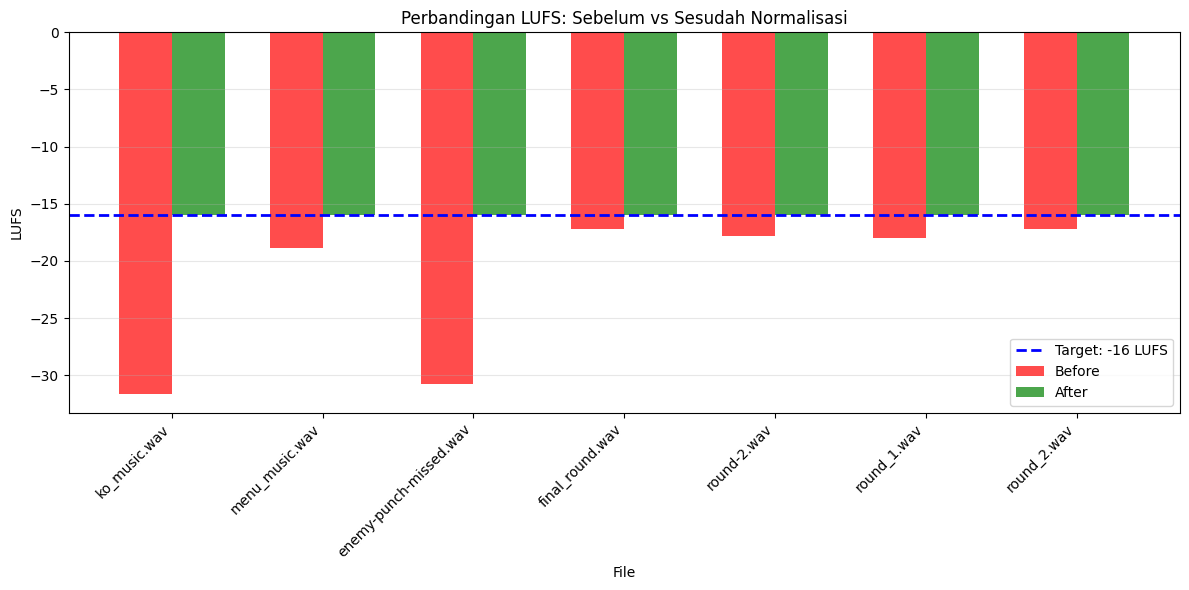


📊 SUMMARY:
Average improvement: 5.65 dB
All files now at target: True ✅


In [16]:
# Plot perbandingan sebelum dan sesudah normalisasi
if len(df_results) > 0:
    plt.figure(figsize=(12, 6))
    
    x = range(len(df_results))
    width = 0.35
    
    plt.bar([i - width/2 for i in x], df_results['original_lufs'], width, 
            label='Before', color='red', alpha=0.7)
    plt.bar([i + width/2 for i in x], df_results['new_lufs'], width, 
            label='After', color='green', alpha=0.7)
    
    plt.axhline(y=-16, color='blue', linestyle='--', linewidth=2, label='Target: -16 LUFS')
    
    plt.xlabel('File')
    plt.ylabel('LUFS')
    plt.title('Perbandingan LUFS: Sebelum vs Sesudah Normalisasi')
    plt.xticks(x, df_results['filename'], rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("\n📊 SUMMARY:")
    print(f"Average improvement: {(df_results['new_lufs'] - df_results['original_lufs']).mean():.2f} dB")
    print(f"All files now at target: {all(abs(df_results['new_lufs'] - TARGET_LUFS) < 0.5)} ✅")
else:
    print("ℹ️  Tidak ada file yang perlu dinormalisasi (semua sudah >= -16 LUFS)")